In [1]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data_folder = 'FMNIST'
fmnist = datasets.FashionMNIST(data_folder, download=False, train=True)

In [4]:
tr_images = fmnist.data
tr_targets = fmnist.targets

In [5]:
unique_values = tr_targets.unique()
print(f'tr_images & tr_targets:\n\tX -{tr_images.shape}\n\tY -{tr_targets.shape}\n\tY -Unique Values : {unique_values}')
print(f'TASK:\n\t{len(unique_values)} class Classification')
print(f'UNIQUE CLASSES:\n\t{fmnist.classes}') 

tr_images & tr_targets:
	X -torch.Size([60000, 28, 28])
	Y -torch.Size([60000])
	Y -Unique Values : tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
TASK:
	10 class Classification
UNIQUE CLASSES:
	['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


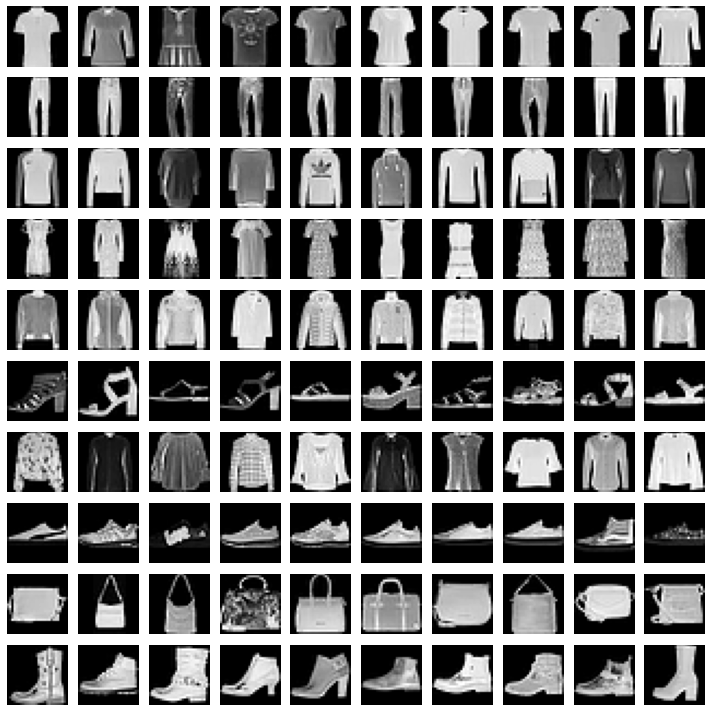

In [6]:
R, C = len(tr_targets.unique()), 10
fig, ax = plt.subplots(R, C, figsize=(10, 10))

for label_class, plot_row in enumerate(ax):
    label_x_rows = np.where(tr_targets == label_class)[0]
    
    for plot_cell in plot_row:
        plot_cell.grid(False);
        plot_cell.axis('off');
        ix = np.random.choice(label_x_rows)
        x, y = tr_images[ix], tr_targets[ix]
        plot_cell.imshow(x, cmap='gray')
        
plt.tight_layout()

In [7]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [8]:
class FMNISTDataset(Dataset):
    def __init__(self, x, y):
        x = x.float()/255
        x = x.view(-1, 28*28)
        self.x, self.y = x.detach().clone(), y.detach().clone()
    def __len__(self):
        return len(self.x)
    def __getitem__(self, ix):
        x, y = self.x[ix], self.y[ix]
        return x.to(device), y.to(device)

In [9]:
def get_data():
    train = FMNISTDataset(tr_images, tr_targets)
    train_dl = DataLoader(train, batch_size=32, shuffle=True)
    return train_dl

In [10]:
from torch.optim import SGD

def get_model():
    model = nn.Sequential(
        nn.Linear(28*28, 1000),
        nn.ReLU(),
        nn.Linear(1000, 10)
    ).to(device)
    loss_fn = nn.CrossEntropyLoss()
    optimizer = SGD(model.parameters(), lr=1e-2)
    return model, loss_fn, optimizer

In [11]:
def train_batch(x, y, model, loss_fn ,opt):
    model.train()
    prediction = model(x)
    loss_value = loss_fn(prediction, y)
    loss_value.backward()
    opt.step()
    opt.zero_grad()
    return loss_value.item()

In [12]:
@torch.no_grad()
def accuracy(x, y, model):
    model.eval()
    prediction = model(x)
    max_values, argmaxes = prediction.max(-1)
    is_correct = argmaxes == y
    return is_correct.cpu().numpy().tolist()

/var/folders/sh/lq27qb6n42n4sn6329x4s1mc0000gn/T/ipykernel_808/1620365950.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) \


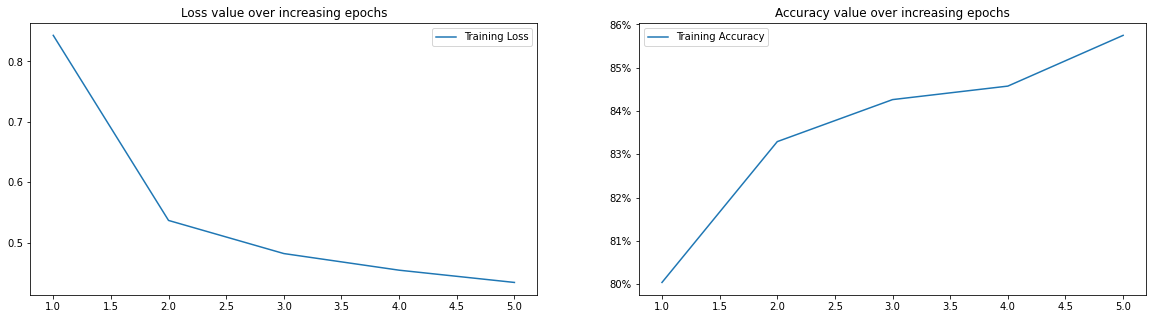

In [13]:
train_dl = get_data()
model, loss_fn, opt = get_model()

losses, accuracies = [], []

for epoch in range(5):
    epoch_losses, epoch_accuracies = [], []
    
    for ix, (x, y) in enumerate(iter(train_dl)):
        batch_loss = train_batch(x, y, model, loss_fn, opt)
        epoch_losses.append(batch_loss)
    epoch_loss = np.array(epoch_losses).mean()
    
    for ix, (x, y) in enumerate(iter(train_dl)):
        is_correct = accuracy(x, y, model)
        epoch_accuracies.extend(is_correct)
    epoch_accuracy = np.mean(epoch_accuracies)
    
    losses.append(epoch_loss)
    accuracies.append(epoch_accuracy)
    
epochs = np.arange(5)+1
plt.figure(figsize=(20,5))
plt.subplot(121)
plt.title('Loss value over increasing epochs')
plt.plot(epochs, losses, label='Training Loss')
plt.legend()
plt.subplot(122)
plt.title('Accuracy value over increasing epochs')
plt.plot(epochs, accuracies, label='Training Accuracy')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) \
                           for x in plt.gca().get_yticks()]) 
plt.legend()

In [14]:
data_folder = 'FMNIST'
fmnist = datasets.FashionMNIST(data_folder, download=True, train=True)

In [15]:
tr_images = fmnist.data
tr_targets = fmnist.targets

In [16]:
class FashionMNISTDataset(Dataset):
    def __init__(self, x, y):
        x = x.float()/255
        x = x.view(-1, 28*28)
        self.x, self.y = x, y
    def __len__(self):
        return len(self.x)
    def __getitem__(self, ix):
        x, y = self.x[ix], self.y[ix]
        return x.to(device), y.to(device)

In [17]:
def get_data():
    train = FashionMNISTDataset(tr_images, tr_targets)
    train_dl = DataLoader(train, batch_size=16, shuffle=True)
    return train_dl

In [18]:
def get_model():
    model = nn.Sequential(
        nn.Linear(28*28, 1000),
        nn.ReLU(),
        nn.Linear(1000, 10)
    ).to(device)
    loss_fn = nn.CrossEntropyLoss()
    opt = SGD(model.parameters(), lr=1e-2)
    return model, loss_fn, opt

In [19]:
def train_batch(x, y, model, loss_fn, opt):
    model.train()
    predictions = model(x)
    loss_values = loss_fn(predictions, y)
    loss_values.backward()
    opt.step()
    opt.zero_grad()
    return loss_values.item()

In [20]:
@torch.no_grad()
def accuracy(x, y, model):
    model.eval()
    predictions = model(x)
    max_values, argmaxes = predictions.max(-1)
    is_correct = argmaxes == y
    return is_correct.cpu().numpy().tolist()

In [21]:
from tqdm import tqdm
import time

def progress_bar(steps):
    for i in tqdm (range (steps), 
               desc="Training...", 
               ascii=False, ncols=100):
        time.sleep(0.01)

In [22]:
train_dl = get_data()
model, loss_fn, opt = get_model()

losses, accuracies = [], []

for epoch in range(5):
    epoch_losses, epoch_accuracies = [], []
    print(f"Epoch {epoch+1}/5:\n")
    progress_bar(len(train_dl))
    
    for ix, (x, y) in enumerate(iter(train_dl)):
        batch_loss = train_batch(x, y, model, loss_fn, opt)
        epoch_losses.append(batch_loss)
    epoch_loss = np.array(epoch_losses).mean()
    
    for ix, (x, y) in enumerate(iter(train_dl)):
        is_correct = accuracy(x, y, model)
        epoch_accuracies.extend(is_correct)
    epoch_accuracy = np.mean(epoch_accuracies)
    
    print(f"Loss: {epoch_loss}\tAccuracy: {epoch_accuracy}\n")
    
    losses.append(epoch_loss)
    accuracies.append(epoch_accuracy)

Epoch 1/5:



Training...: 100%|██████████████████████████████████████████████| 3750/3750 [00:45<00:00, 82.30it/s]


Loss: 0.7011751066128413	Accuracy: 0.8192166666666667

Epoch 2/5:



Training...: 100%|██████████████████████████████████████████████| 3750/3750 [00:45<00:00, 81.95it/s]


Loss: 0.47921301183402537	Accuracy: 0.8356833333333333

Epoch 3/5:



Training...: 100%|██████████████████████████████████████████████| 3750/3750 [00:43<00:00, 86.61it/s]


Loss: 0.43577292125026384	Accuracy: 0.8578333333333333

Epoch 4/5:



Training...: 100%|██████████████████████████████████████████████| 3750/3750 [00:45<00:00, 81.56it/s]


Loss: 0.4094680187692245	Accuracy: 0.8626166666666667

Epoch 5/5:



Training...: 100%|██████████████████████████████████████████████| 3750/3750 [00:46<00:00, 81.29it/s]


Loss: 0.38892025416493414	Accuracy: 0.8677333333333334



/var/folders/sh/lq27qb6n42n4sn6329x4s1mc0000gn/T/ipykernel_808/2407115040.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) \


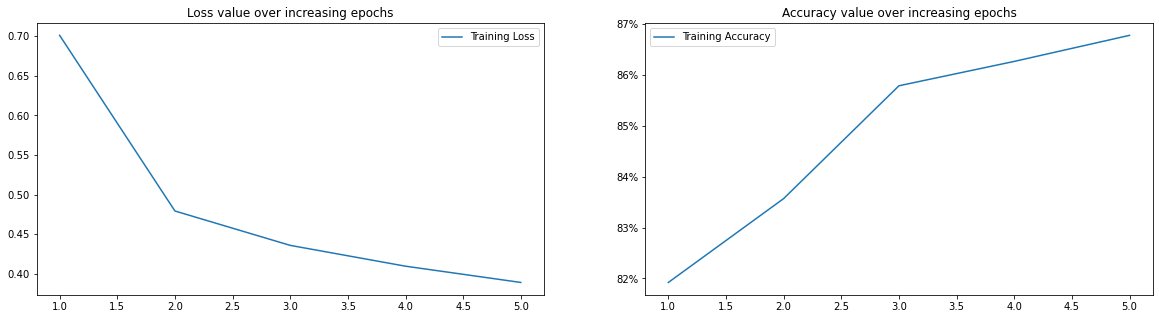

In [23]:
epochs = np.arange(5)+1
plt.figure(figsize=(20,5))
plt.subplot(121)
plt.title('Loss value over increasing epochs')
plt.plot(epochs, losses, label='Training Loss')
plt.legend()
plt.subplot(122)
plt.title('Accuracy value over increasing epochs')
plt.plot(epochs, accuracies, label='Training Accuracy')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) \
                           for x in plt.gca().get_yticks()]) 
plt.legend()